# Prepare data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from preparation import prepare_data, select_by_date_interval
from plotting import h_bar_plot, get_videos_per_h, month_bar_plot, get_videos_per_month, stacked_bar_with_labels

In [2]:
plt.rcParams['figure.dpi'] = 150 # make your graphs bigger
style.use('seaborn') # apply style for your plot. Hard to read letters in pie charts if style isn't suitable

In [3]:
PATH = "C:/Users/San/Documents/CS projects/yt_activity_analysis/data/Takeout/YouTube and YouTube Music/history/watch-history.json"
df = prepare_data(PATH)

# start_date = "2022-08-01"
# end_date = "2022-09-30"
# df = select_by_date_interval(df0, start=start_date)
df

,video_title,channel_name,time,app
0,lofi hip hop radio - beats to relax/study to,Lofi Girl,2022-09-26 12:48:39.149000+03:00,YouTube
1,Matt Quentin Waves,ChilledCow,2022-09-26 12:48:04.115000+03:00,YouTube Music
2,Run Boy Run,Woodkid - Topic,2022-09-26 12:44:30.777000+03:00,YouTube Music
3,Kalus'ki vechornici (feat. Tember Blanche),KALUSH - Topic,2022-09-26 12:41:46.503000+03:00,YouTube Music
4,Чути гімн,Skofka - Topic,2022-09-26 12:39:17.385000+03:00,YouTube Music
...,...,...,...,...
7045,TARDIGRADE INFERNO - WE ARE NUMBER ONE (2019),Tardigrade Inferno,2022-04-06 13:35:36.057000+03:00,YouTube
7046,Учасники «Чорнобаївського серіалу» боронять Ми...,АрміяInform,2022-04-06 13:33:50.430000+03:00,YouTube
7047,Звірства росіян у Бородянці. Катування мирних ...,STERNENKO,2022-04-06 13:03:25.129000+03:00,YouTube
7048,"ЧОМУ НЕ БУВАЄ ""ХАРОШИХ РУССКИХ""?",Загін Кіноманів,2022-04-06 12:36:08.058000+03:00,YouTube


# Count on how many videos you clicked per channel

In [4]:
counts = df["channel_name"].value_counts()
counts

STERNENKO                  246
Eurovision Song Contest    209
Viva La Dirt League        103
Adam Something              94
Sky News                    89
                          ... 
Maths Academy                1
Integrals ForYou             1
Mark Felton Productions      1
David Lightbringer           1
АрміяInform                  1
Name: channel_name, Length: 1608, dtype: Int64

# Break into categories

In [5]:
bins = [0, 1, 5, 10, 20, 50, np.inf]
names = ['1', '2-5', '6-10', '11-20', '21-50', ">50"]

intervals = pd.cut(counts, bins, labels=names)

df2 = pd.DataFrame({"video_count": counts, "interval": intervals})
df2

,video_count,interval
STERNENKO,246,>50
Eurovision Song Contest,209,>50
Viva La Dirt League,103,>50
Adam Something,94,>50
Sky News,89,>50
...,...,...
Maths Academy,1,1
Integrals ForYou,1,1
Mark Felton Productions,1,1
David Lightbringer,1,1


# Plot percentage of categories

In [6]:
interval_count = df2["interval"].value_counts()
percentage = interval_count/len(df2)
percentage

1        0.625000
2-5      0.236318
6-10     0.052861
11-20    0.038557
21-50    0.036070
>50      0.011194
Name: interval, dtype: float64

<AxesSubplot:ylabel='interval'>

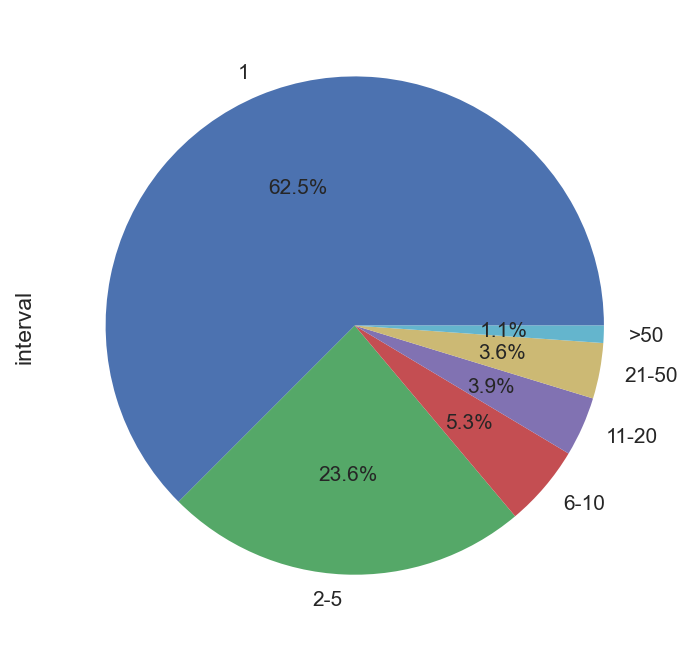

In [7]:
percentage.plot.pie(autopct='%1.1f%%')

# Plot n most watched channels

1904

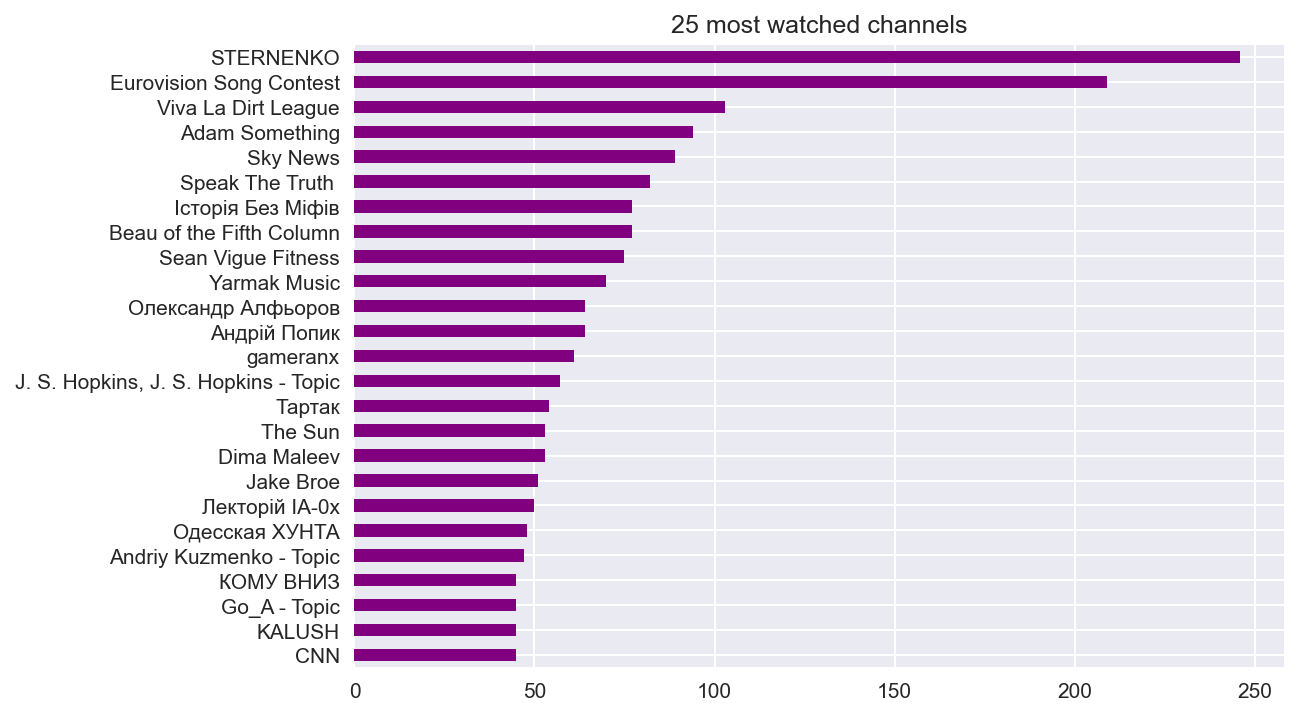

In [8]:
n = 25
top_n_channels = counts.iloc[:n]
ax = top_n_channels.plot(kind="barh", color="purple", title=f"{n} most watched channels")
ax.invert_yaxis()
sum(top_n_channels)

# Count on how many videos you clicked per hour

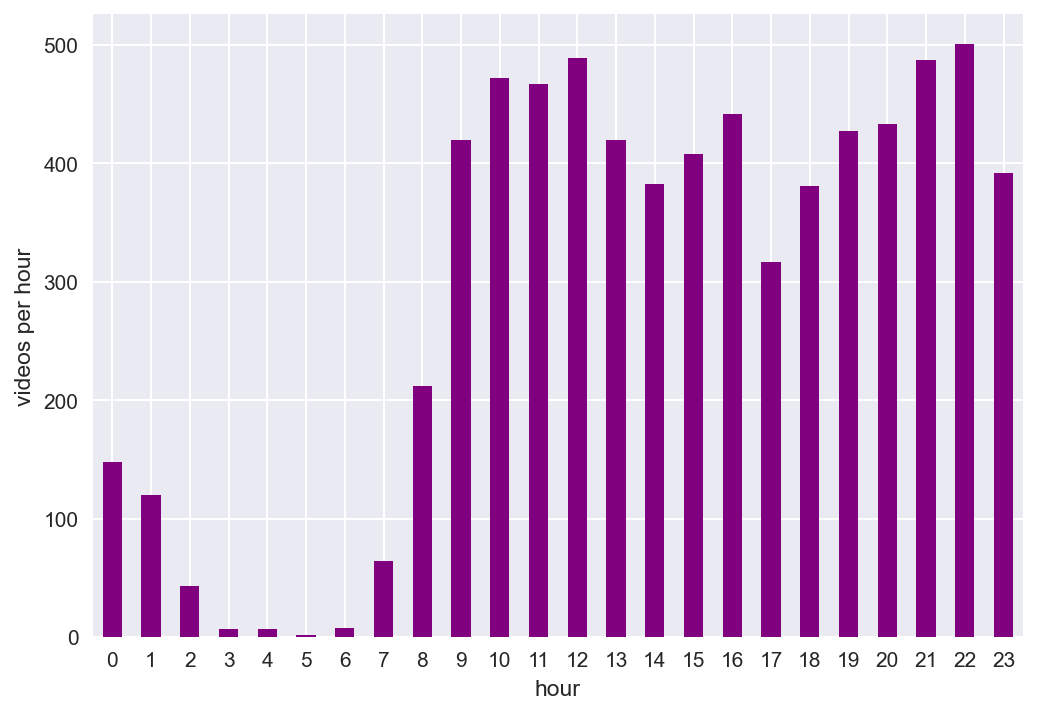

In [9]:
h_bar_plot(df)

# Discover at what hours you watch a particular channel 

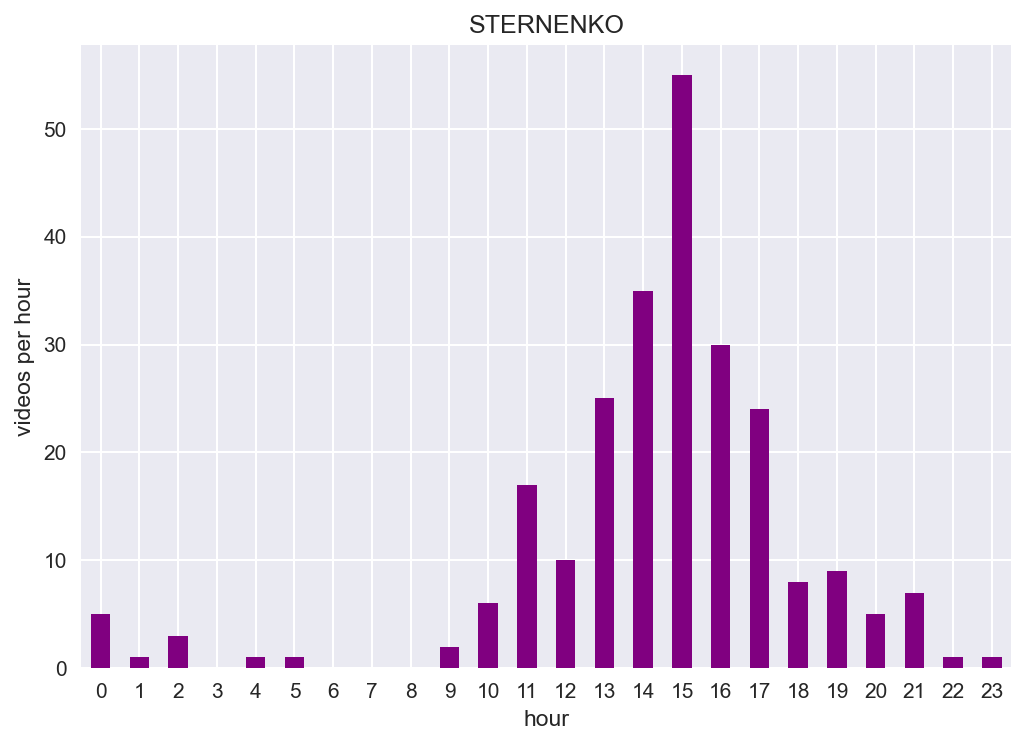

In [10]:
channel_name_to_look = "STERNENKO"
h_bar_plot(df, channel_name_to_look)

# Plot videos count per hour for several channels

In [11]:
list_top_n_channels = top_n_channels.index.to_list()
list_top_n_channels[:10]

['STERNENKO',
 'Eurovision Song Contest',
 'Viva La Dirt League',
 'Adam Something',
 'Sky News',
 'Speak The Truth ',
 'Історія Без Міфів',
 'Beau of the Fifth Column',
 'Sean Vigue Fitness',
 'Yarmak Music']

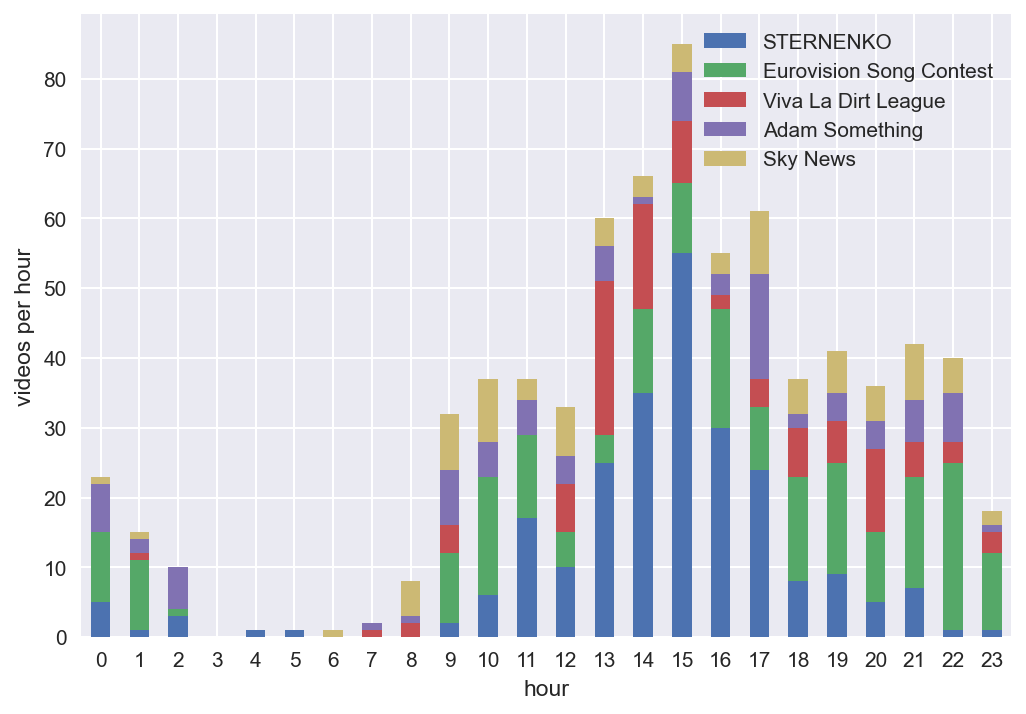

In [12]:
start_point = 0
interval = 5
end_point = start_point + interval

df_data = {f"{list_top_n_channels[start_point]}": get_videos_per_h(
    df, list_top_n_channels[start_point])}
df_top_n_channels = pd.DataFrame(data=df_data)
for i in range(start_point+1, end_point):
    df_top_n_channels[list_top_n_channels[i]] = get_videos_per_h(
        df, list_top_n_channels[i])
df_top_n_channels
df_top_n_channels.plot.bar(stacked=True, rot=0,
                           xlabel="hour", ylabel="videos per hour").legend(bbox_to_anchor=(1,1))

# Count how many videos you click per day of week

<AxesSubplot:>

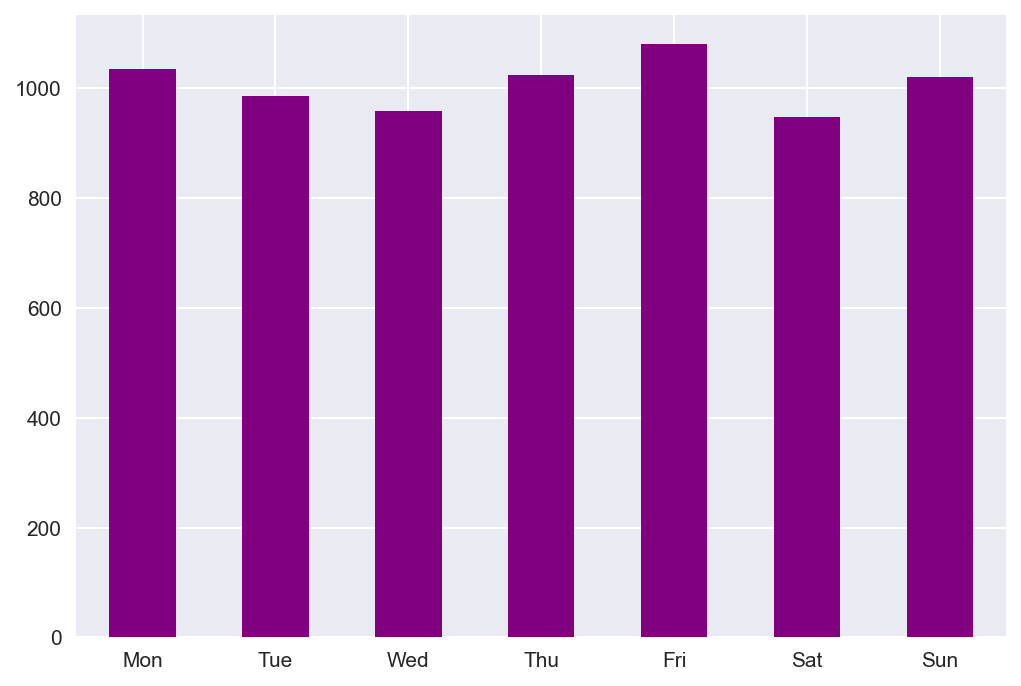

In [13]:
df['weekday'] = df['time'].dt.strftime('%a')
total = len(df["weekday"])
str_week_days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
videos_per_weekday = df["weekday"].value_counts()[str_week_days] # sort with custom index
videos_per_weekday.plot.bar(color="purple", rot=0)

# Change in use of a particular channel over months (Use all data for this!)

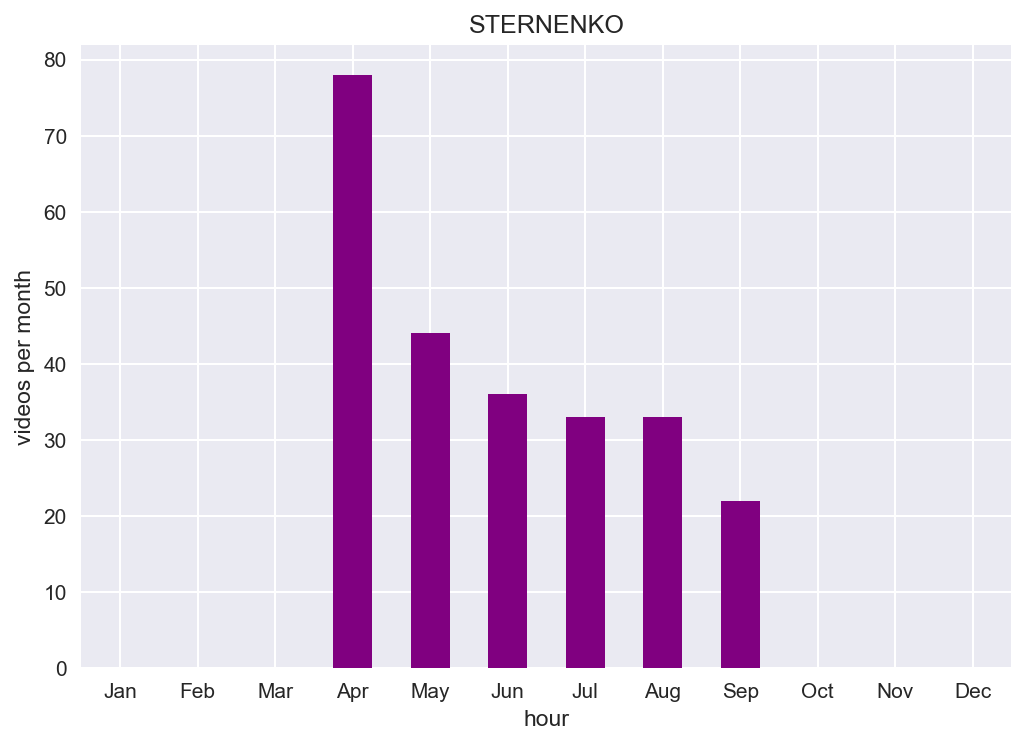

In [14]:
channel_name = "STERNENKO"
month_bar_plot(df, channel_name)

# See how many videos you watched/listened to in YT and YT music over months

In [15]:
yt_df = df.loc[df["app"] == "YouTube"]
yt = get_videos_per_month(yt_df)
music_df = df.loc[df["app"] == "YouTube Music"]
music = get_videos_per_month(music_df)

months = yt.index.tolist()
yt_use_progress = pd.DataFrame({"YT": yt, "YT Music": music}, index=months) 

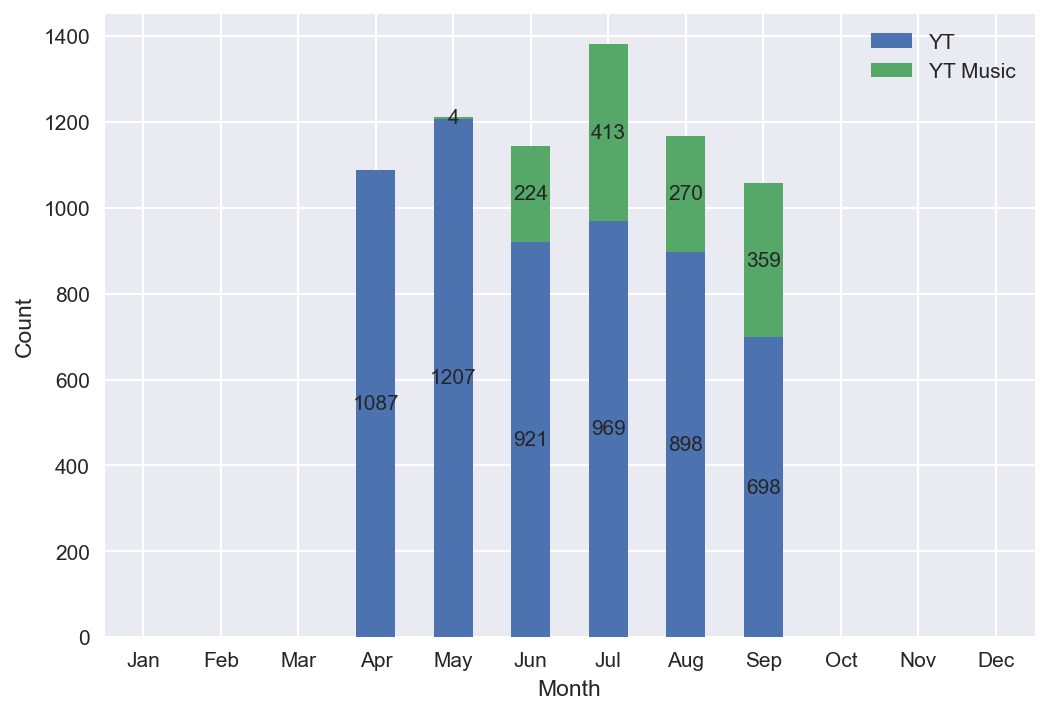

In [18]:
stacked_bar_with_labels(yt_use_progress[["YT", "YT Music"]])

# See how your use of YT music changed in percentages over months

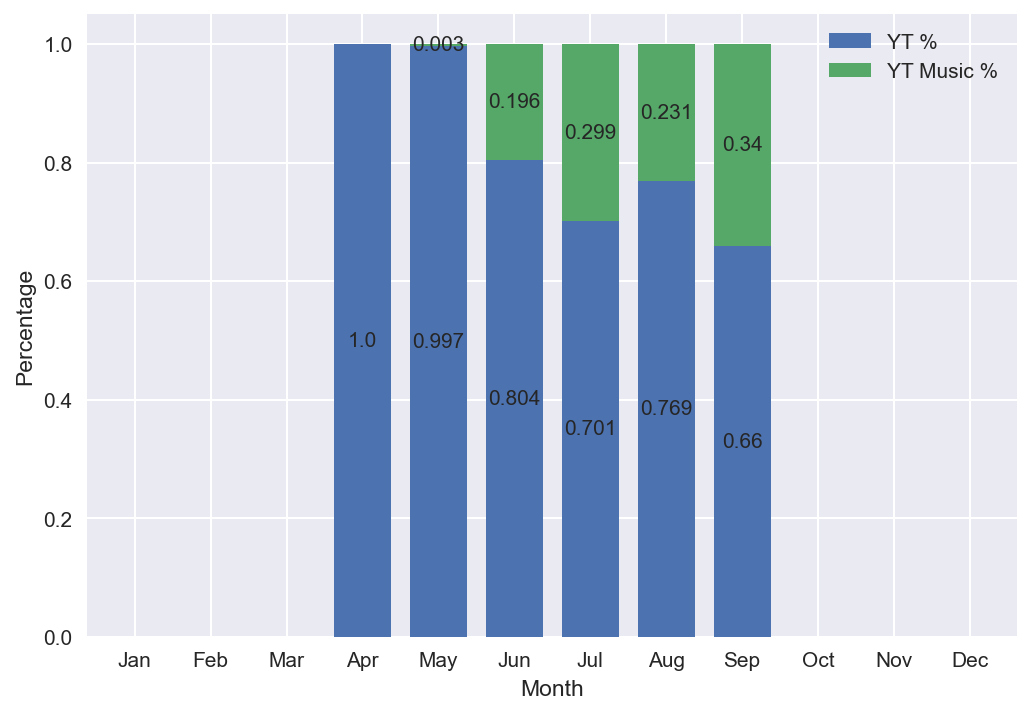

In [20]:
yt_use_progress["Total"] = yt_use_progress["YT"] + yt_use_progress["YT Music"]
yt_use_progress["YT %"] = yt_use_progress["YT"] / yt_use_progress["Total"]
yt_use_progress["YT Music %"] = yt_use_progress["YT Music"] / yt_use_progress["Total"]
yt_use_progress = yt_use_progress.round(3) # round all floats in df to 3 places

stacked_bar_with_labels(yt_use_progress[["YT %", "YT Music %"]], float_num=True, bar_width=0.75)